# Task 2: Exploratory Data Analysis on Titanic Dataset
### Internship Project – Elevvo

This notebook explores the Titanic dataset using Python (Pandas, Seaborn, Matplotlib).

## Steps:
1. Data Loading
2. Data Cleaning (handle missing values, convert types)
3. Summary Statistics
4. Group-Based Insights (survival by gender/class)
5. Visualizations (bar plots, histograms, heatmap)
6. Insights & Conclusions


## Initialization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading dataset
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1: Data Inspection

In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 2: Data Cleaning

In [ ]:
#Filling missing data with median
df['Age'] = df['Age'].fillna(df['Age'].median()) 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#dropping the column entirely as there is too much missing
df = df.drop(columns=['Cabin'])

#Mapping male to 0, female to 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' categorical column into numeric dummy variables (Q, S), drop 'C' as baseline
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

## Step 3: Summary Statistics

In [4]:
df.describe()
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

## Step 4: Group-Based Insights

In [5]:
#Average survival rate based on gender and passenger class
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Step 5: Visualizations

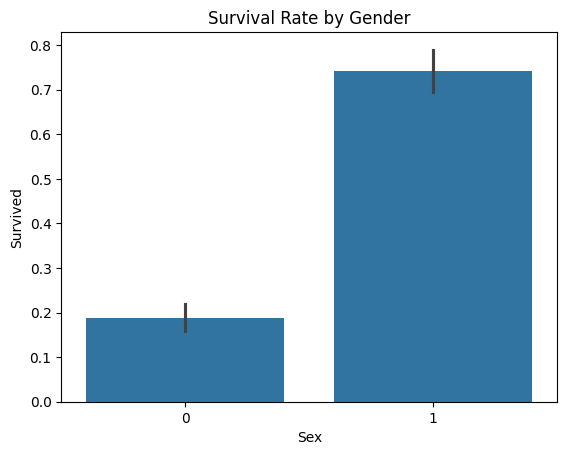

In [6]:
#Plot for survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

## Insight:
Women had a much higher survival rate of 74%, compared to men which had 19%. Clearly, the principle “women and children first” was followed.

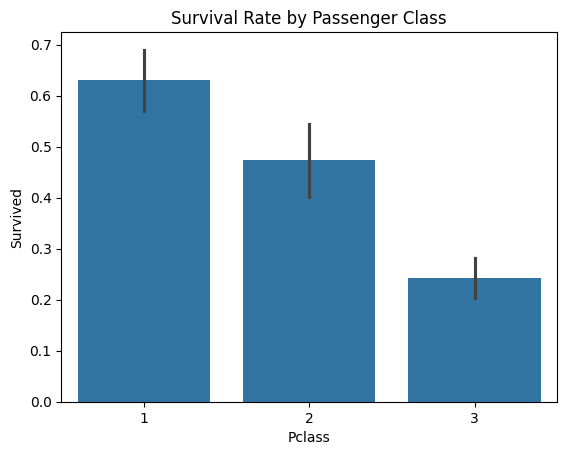

In [7]:
#Plot for survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## Insight:
Passenger class had a strong effect on survival chances. Around 63% of 1st-class passengers survived, compared to 47% of 2nd class and only 24% of 3rd class. Wealth and social status most likely impacted access to lifeboats.

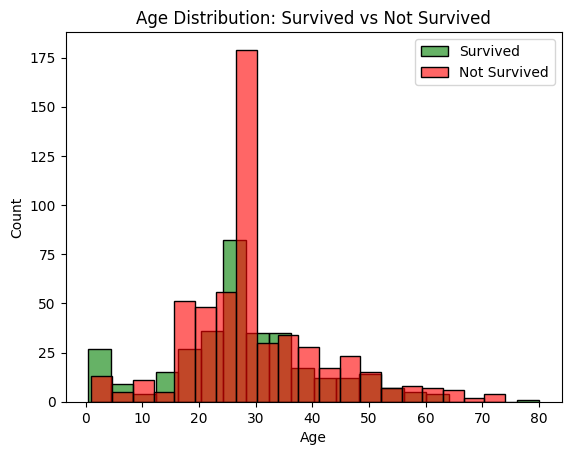

In [8]:
#Plot comparing amount of people survived vs not survived, based on their age
sns.histplot(df[df['Survived']==1]['Age'], bins=20, color='green', label='Survived', alpha=0.6)
sns.histplot(df[df['Survived']==0]['Age'], bins=20, color='red', label='Not Survived', alpha=0.6)
plt.legend()
plt.title('Age Distribution: Survived vs Not Survived')
plt.show()

## Insight:
Children under 10 had noticeably better survival rates compared to adults. Most adults between 30–50 had lower chances of survival. This suggests that families with children may have been prioritized during evacuation.

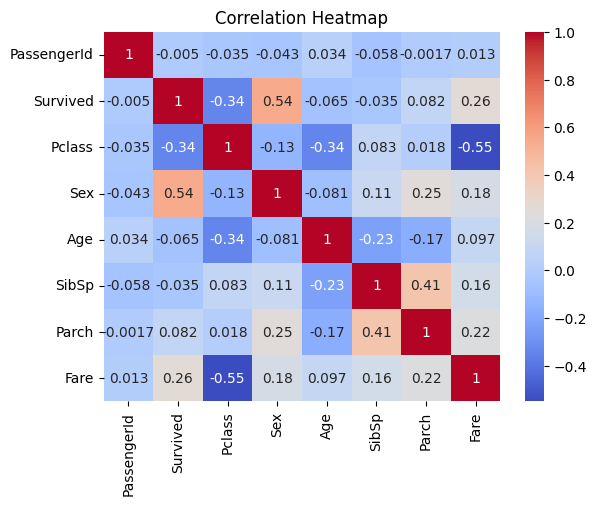

In [9]:
# Bonus: Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Insight:

- Sex (female=1) has the strongest positive correlation with survival.

- Pclass shows a negative correlation — higher class meant better survival.

- Fare is positively correlated with survival, reinforcing the wealth effect.

- Age has only a weak negative correlation, but children clearly fared better.

## Step 6: Final Conclusion
The analysis of the Titanic dataset reveals that survival was far from random. Gender was the strongest determinant — nearly three-quarters of women survived, compared to less than one-fifth of men. Passenger class also played a major role: 1st-class passengers had much higher survival rates than those in 3rd class, highlighting the impact of wealth and status. Children, especially those under 10, had better odds of survival compared to most adults, reflecting the priority given to families during evacuation. Fare prices further reinforced this trend, with higher-paying passengers more likely to survive.

Overall, survival on the Titanic was heavily influenced by gender, class, and wealth, while age played a secondary role. These findings illustrate how social and economic factors shaped outcomes even in life-and-death situations.